In [1]:
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('organized.csv')

In [2]:
dataset.head()

,Gender,Age,Education,Country,Risk_perception,Personal_knowledge,Social_knowledge,Direct_experience,Social_amplification,Prosociality,Individualism_worldview,Turst_government,Trust_science,Trust_medical_professionals,Personal_efficacy,Collective_efficacy,political_ideology
0,2,50.0,3.0,IT,4.0,1.0,1.0,3.0,1.0,2.0,1.0,1.0,5.0,5.0,3.0,2.0,2.0
1,1,32.0,4.0,IT,7.0,7.0,6.0,2.0,1.0,7.0,6.0,7.0,5.0,4.0,7.0,7.0,4.0
2,2,32.0,3.0,IT,4.0,4.0,3.0,8.0,1.0,3.0,2.0,4.0,5.0,4.0,4.0,4.0,4.0
3,2,45.0,5.0,IT,6.0,4.0,4.0,3.0,1.0,6.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
4,1,52.0,5.0,IT,7.0,6.0,6.0,8.0,1.0,4.0,2.0,4.0,5.0,5.0,6.0,5.0,4.0


In [4]:
dataset = dataset[[i for i in list(dataset.columns) if i not in ['Gender','Age','Education']]]

In [8]:
column_name = list(dataset.columns)
column_name.remove('Country')

In [19]:
dataset.Country.unique()[0]

'IT'

In [45]:
column_name

['Risk_perception',
 'Personal_knowledge',
 'Social_knowledge',
 'Direct_experience',
 'Social_amplification',
 'Prosociality',
 'Individualism_worldview',
 'Turst_government',
 'Trust_science',
 'Trust_medical_professionals',
 'Personal_efficacy',
 'Collective_efficacy',
 'political_ideology']

In [24]:
country_name = list(dataset.Country.unique())
country_name.remove('IT')

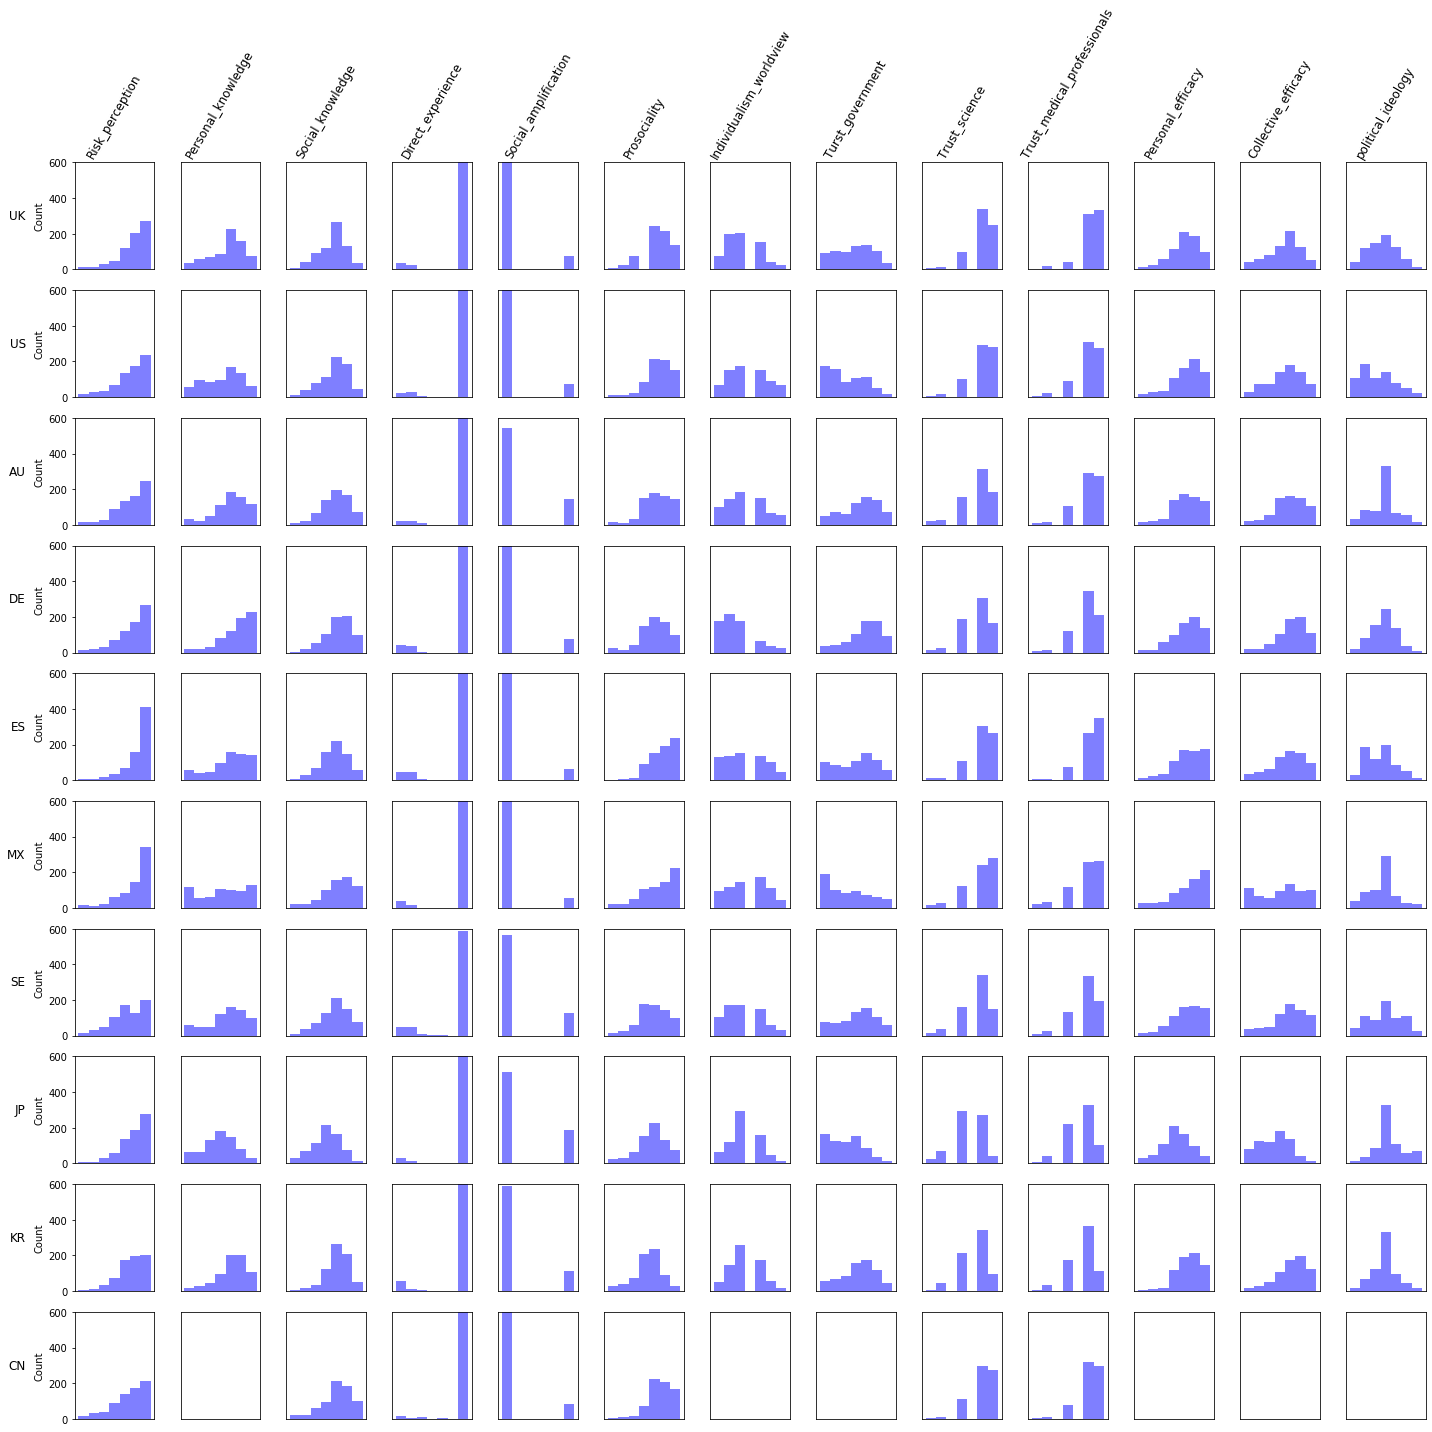

In [52]:
import numpy as np
nrows = len(country_name)
ncols = len(column_name)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,20))
cols = column_name
rows = country_name
for i in range(nrows):
    for j in range(ncols):
        ax = axes[i][j]
        plot_dataset = dataset.loc[dataset['Country']==country_name[i]][column_name[j]]
        ax.hist(plot_dataset[np.isfinite(plot_dataset)], bins=7
                , color='blue', alpha=0.5)
        if j!=0:
            ax.set_yticks([])
            ax.set_xticks([])
        if j==0:
            ax.set_xticks([])


        if j==0:
            ax.set_ylabel('Count')
        ax.set_ylim([0, 600])
        
pad = 5 # in points

for ax, col in zip(axes[0], cols):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline', rotation=60)

for ax, row in zip(axes[:,0], rows):
    ax.annotate(row,xy=(0, 0.5), xytext=(-ax.yaxis.labelpad-pad,0),                    
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')

fig.tight_layout()
plt.show()